### **Linear Regression**
<p align = "justify">
This exercise will help you to review the algorithm of Linear Regression. We will implement the model in way of vectorization using stochastic gradient descent, m samples (mini-batch gradient descent), and N samples (batch gradient descent). This exercise will use the advertising dataset. The overview of this dataset is shown below.
</p>

#### Dataset 
<p align = "justify"> 
Dataset has 200 samples, with 4 features including TV, Radio, Newspaper and Sales. We will use the former 3 features (TV, Radio and Newspaper) to predict Sales using linear Regression model. The dataset is available in the file "advertising.csv". This is the first 5 samples of this.
</p>

In [1]:
# Overview of Dataset
import pandas as pd
data = pd.read_csv('advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [3]:
## Skimming through the Sales columns 
import plotly.express as px
import plotly.subplots as sp
%config InlineBackend.figure_format ='retina'

def apply_layout(fig):
    fig.update_layout(
        title=dict(
            font=dict(size=24, color='#333'),
            x=0.5
        ),
        font=dict(
            family="Arial", 
            size=12,
            color="#333"
        ),
        plot_bgcolor="White",
        paper_bgcolor="White",
        margin=dict(l=40, r=40, t=80, b=40)
    )
    return fig

color_palette = {
    'TV': '#003f5c',
    'Radio': '#58508d',
    'Newspaper': '#bc5090'
}

fig_tv = px.scatter(data, x='TV', y='Sales', title='TV vs Sales', 
                    color_discrete_sequence=[color_palette['TV']])

fig_radio = px.scatter(data, x='Radio', y='Sales', title='Radio vs Sales',
                       color_discrete_sequence=[color_palette['Radio']])

fig_newspaper = px.scatter(data, x='Newspaper', y='Sales', title='Newspaper vs Sales',
                           color_discrete_sequence=[color_palette['Newspaper']]) 

combined_fig = sp.make_subplots(rows=1, cols=3, subplot_titles=("TV vs Sales", "Radio vs Sales", "Newspaper vs Sales"))
combined_fig.add_traces(fig_tv.data, rows=1, cols=1)
combined_fig.add_traces(fig_tv.data, rows=1, cols=2)
combined_fig.add_traces(fig_newspaper.data, rows=1, cols=3)

combined_fig.update_layout(
    title_text="Advertising Spend vs Sales", 
    xaxis_title="advertising Spend",
    yaxis_title="Sales (in thousands)"
)

combined_fig = apply_layout(combined_fig)

fig_tv.show()
fig_radio.show()
fig_newspaper.show()

#### Regression Process
After skimming through the dataset, we can see that there is a linear relationship between the variables.
Now, it is time to build a linear regression model.

In [4]:
import numpy as np
from numpy import genfromtxt
data = genfromtxt('advertising.csv', delimiter=',', skip_header=1)
N = data.shape[0]
X = data[:, :3]
y = data[:, 3:]

# Normalize input data by using mean normalization
def mean_normalization(X):
    N = len(X)
    maxi = np.max(X)
    mini = np.min(X)
    avg = np.mean(X)
    X = (X - avg)/(maxi - mini)
    X_b = np.c_[np.ones((N, 1)), X]
    return X_b, maxi, mini, avg

X_b, maxi, mini, avg = mean_normalization(X) 

##### Stochastic Gradient Descent

In [40]:
# stochastic gradient descent
def stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.000001):
    thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])
    thetas_path = [thetas]
    losses = []
    for epoch in range(n_epochs):
        for i in range(N):
            # it better be random_index = np.random.randint(N), but for 
            # this example, we will set as i
            random_index = i
            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            
            # Compute output
            yi_hat = xi.dot(thetas)
            
            # Compute loss function
            loss = ((yi - yi_hat) ** 2) / 2

            # Compute gradient for loss
            loss_gradient = yi_hat - yi
            
            # Compute gradient
            gradient = xi.T.dot(loss_gradient)
            
            # Update thetas
            theta_update = learning_rate * gradient
            thetas = thetas - theta_update
            
            # Logging
            thetas_path.append(thetas)
            losses.append(loss[0][0])
            
    return thetas_path, losses 

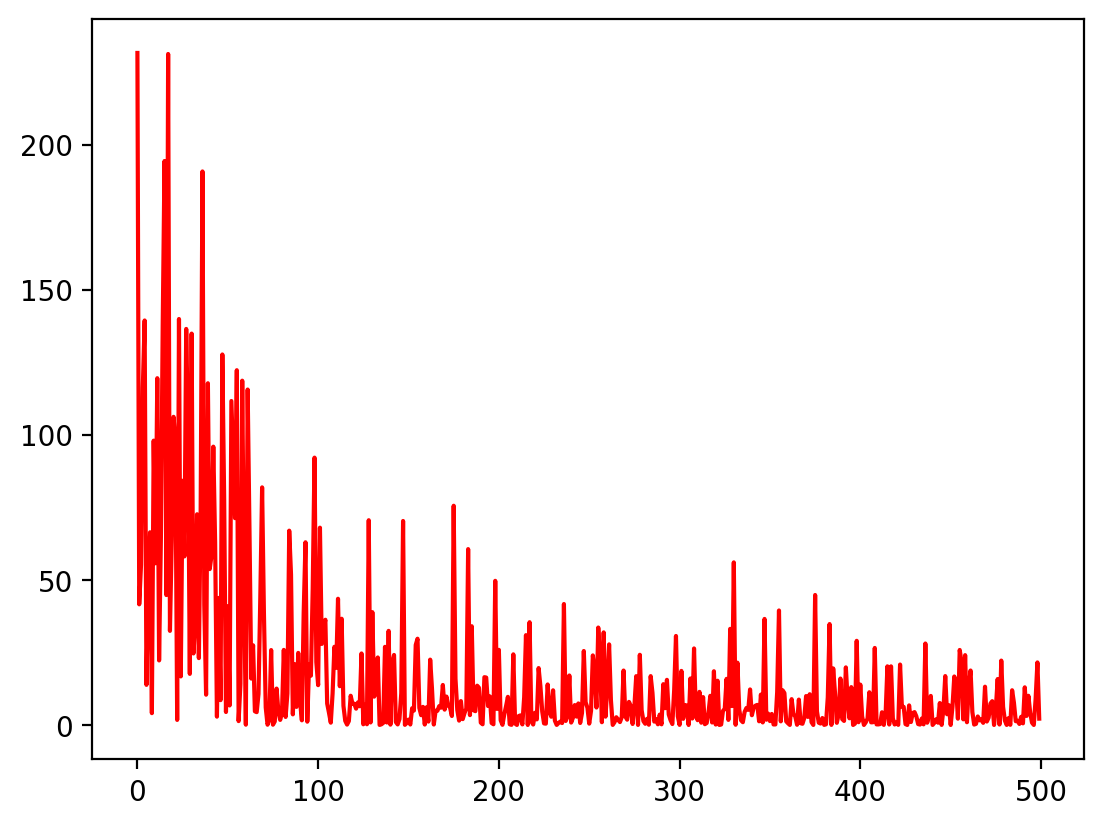

In [41]:
import matplotlib.pyplot as plt

sgd_theta, losses = stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.01)
x_axis = list(range(500))
plt.plot(x_axis, losses[:500], color="r")
plt.show()

In [45]:
## Question 1: Find the sum of losses
sgd_theta, losses = stochastic_gradient_descent(X_b, y, n_epochs=1, learning_rate=0.01)
print(np.sum(losses))

6754.643359356192


##### Mini-Batch Gradient Descent

In [42]:
def mini_batch_gradient_descent(X_b, y, n_epochs=50, minibatch_size=20, learning_rate=0.01):
    thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])
    thetas_path = [thetas]
    losses = []
    
    for epoch in range(n_epochs):
        # For this assignment only, we will use predefined indices
        shuffled_indices = np.asarray([21, 144, 17, 107, 37, 115, 167, 31, 3, 
                                       132, 179, 155, 36, 191, 182, 170, 27, 35, 162, 25, 28, 73, 172, 152, 102, 16,
                                       185, 11, 1, 34, 177, 29, 96, 22, 76, 196, 6, 128, 114, 117, 111, 43, 57, 126,
                                       165, 78, 151, 104, 110, 53, 181, 113, 173, 75, 23, 161, 85, 94, 18, 148, 190,
                                       169, 149, 79, 138, 20, 108, 137, 93, 192, 198, 153, 4, 45, 164, 26, 8, 131,
                                       77, 80, 130, 127, 125, 61, 10, 175, 143, 87, 33, 50, 54, 97, 9, 84, 188, 139,
                                       195, 72, 64, 194, 44, 109, 112, 60, 86, 90, 140, 171, 59, 199, 105, 41, 147, 
                                       92, 52, 124, 71, 197, 163, 98, 189, 103, 51, 39, 180, 74, 145, 118, 38, 47, 
                                       174, 100, 184, 183, 160, 69, 91, 82, 42, 89, 81, 186, 136, 63, 157, 46, 67, 
                                       129, 120, 116, 32, 19, 187, 70, 141, 146, 15, 58, 119, 12, 95, 0, 40, 83, 24, 
                                       168, 150, 178, 49, 159, 7, 193, 48, 30, 14, 121, 5, 142, 65, 176, 101, 55, 
                                       133, 13, 106, 66, 99, 68, 135, 158, 88, 62, 166, 156, 2, 134, 56, 123, 122, 154])
        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        
        for i in range(0, N, minibatch_size):
            xi = X_b_shuffled[i:i+minibatch_size]
            yi = y_shuffled[i:i+minibatch_size]
            
            # Compute output
            yi_hat = xi.dot(thetas)

            # Compute loss
            loss = (yi - yi_hat) ** 2 / 2
            
            # Compute derivative of loss
            loss_gradient = (yi_hat - yi) / minibatch_size
            
            # Compute derivative of parameters
            gradients = xi.T.dot(loss_gradient)
                        
            # Update parameters
            thetas = thetas - learning_rate * gradients 
            thetas_path.append(thetas)
            
            loss_mean = np.sum(loss) / minibatch_size
            losses.append(loss_mean)            
            
    return thetas_path, losses

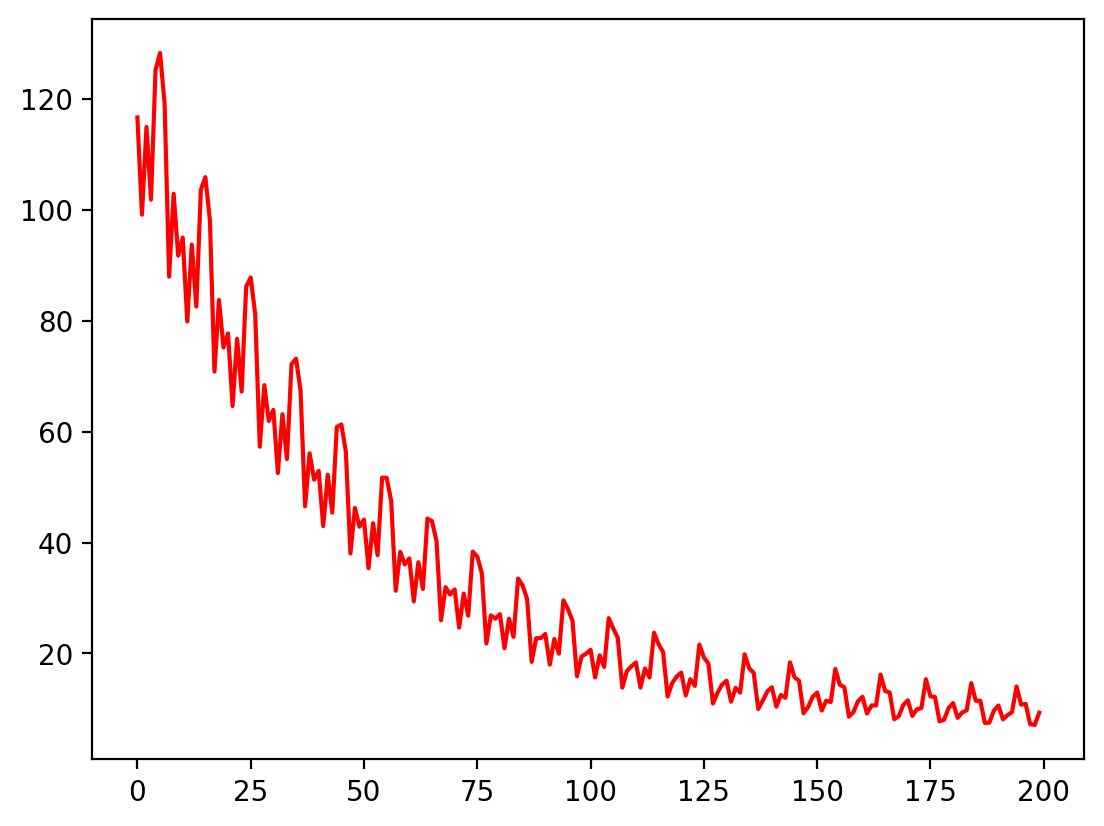

In [43]:
mbgd_thetas, losses = mini_batch_gradient_descent(X_b, y, n_epochs=50, minibatch_size=20, learning_rate=0.01)
x_axis = list(range(200))
plt.plot(x_axis, losses[:200], color="r")
plt.show()

In [44]:
mbgd_thetas, losses = mini_batch_gradient_descent(X_b, y, n_epochs=50, minibatch_size=20, learning_rate=0.01)
print(round(sum(losses), 2))

8865.65


##### Batch Gradient Descent

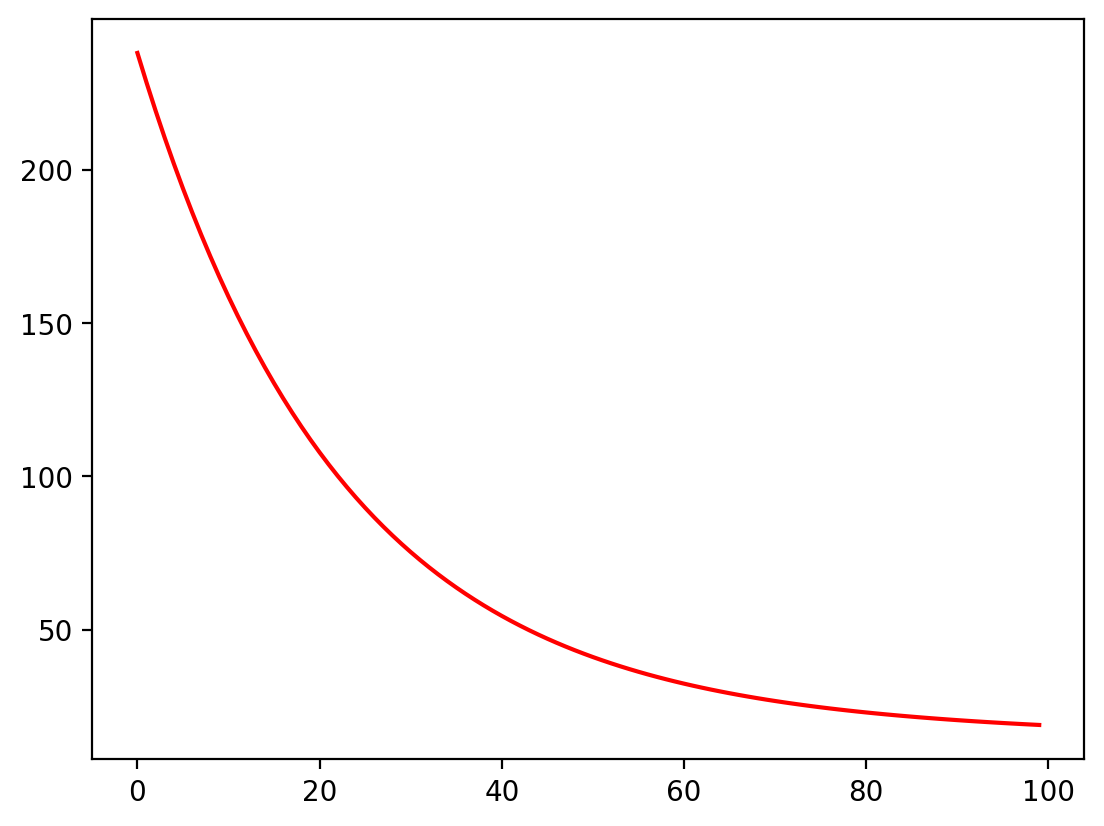

In [46]:
def batch_gradient_descent(X_b, y, n_epochs=100, learning_rate=0.01):
    thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])
    thetas_path = [thetas]
    losses = []
    
    for i in range(n_epochs):
        # Compute output
        y_hat = X_b.dot(thetas)
        
        # Compute loss
        loss = (y - y_hat) ** 2
        
        # Compute loss's derivative 
        loss_gradient = 2 * (y_hat - y) / N
        
        # Compute gradient
        gradients = X_b.T.dot(loss_gradient)
        
        # Update thetas
        thetas = thetas - learning_rate * gradients
        thetas_path.append(thetas)
        
        mean_loss = np.sum(loss) / N
        losses.append(mean_loss)
        
    return thetas_path, losses

bgd_thetas, losses = batch_gradient_descent(X_b, y, n_epochs=100, learning_rate=0.01)
x_axis = list(range(100))
plt.plot(x_axis, losses[:100], color='r')
plt.show() 